In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#Basic EDA

In [ ]:
df = pd.read_csv("bank.csv")
df.head()
df.shape

(11162, 17)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0
11161,34,9,1,1,0,0,0,0,0,9,5,628,1,-1,0,3,0


In [ ]:
df.deposit.value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
# Get the Statistical Information about the dataset
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Check for Duplicate Values
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


<Axes: >

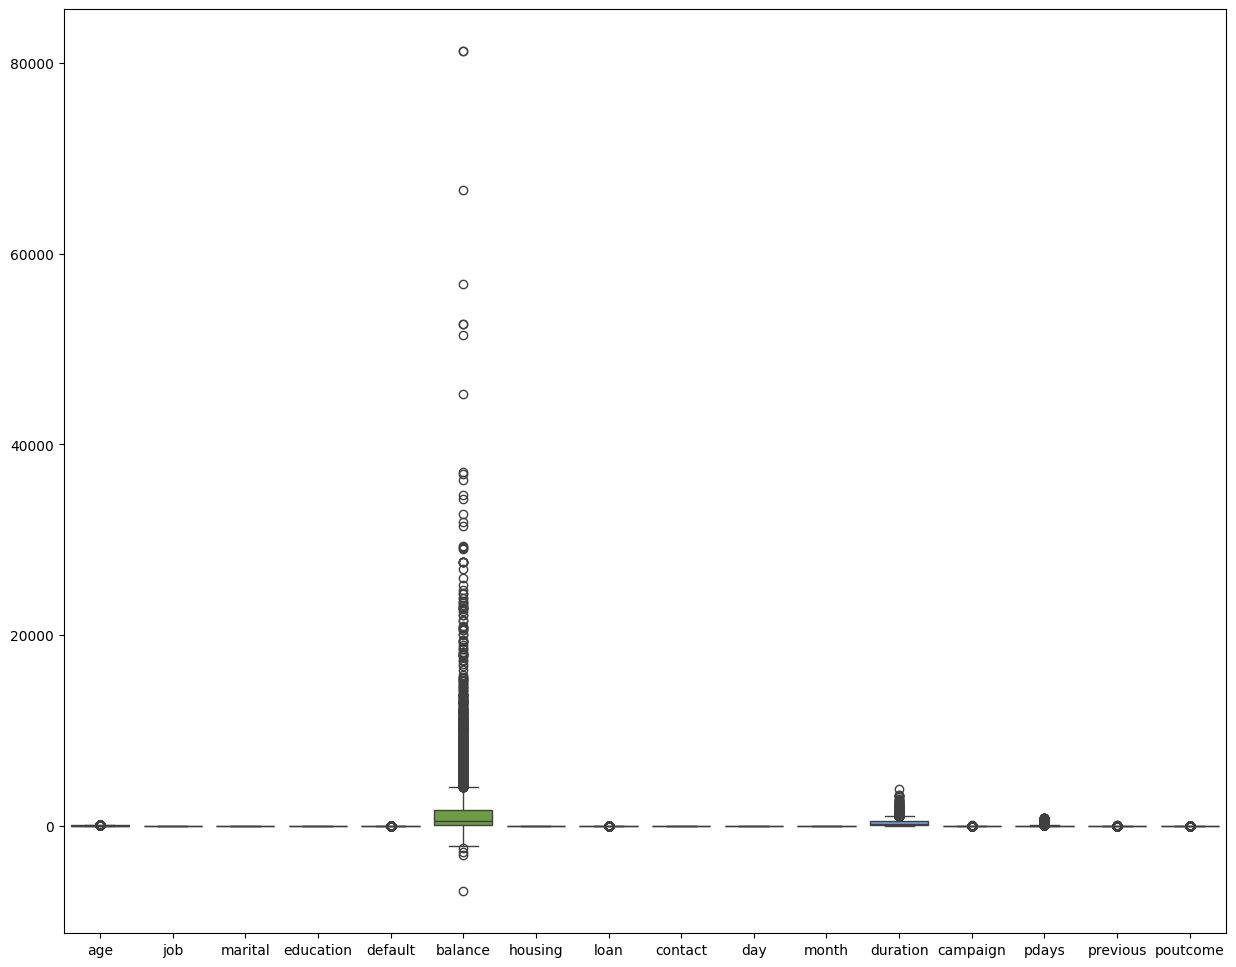

In [ ]:
# Checking for the presence of outliers in numeric cols ('age','trtbps','chol','thalachh','oldpeak')
import seaborn as sns
plt.figure(figsize=(15,12)) # Set the Width & Height
# df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak'])
sns.boxplot(data=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']])

In [ ]:

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : [75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 87, 87, 87, 87, 88, 88, 89, 90, 90, 92, 92, 93, 93, 95]
Outliers in job attribute : []
Outliers in marital attribute : []
Outliers in education attribute : []
Outliers in default attribute : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

#Now we need to handle these outlier using Quantile based flooring and capping method.

In [ ]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['age','default','balance','loan','duration','campaign','pdays','previous','poutcome']:
    df[i]=handle_outliers(df[i])


<Axes: >

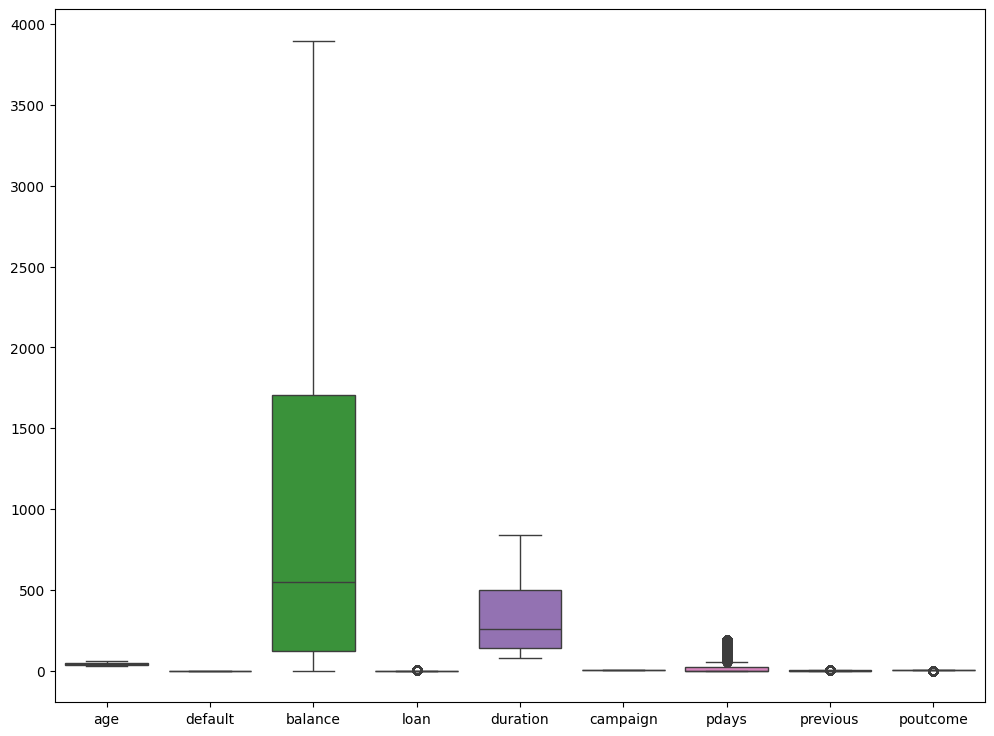

In [ ]:
# verifying again with boxplot

plt.figure(figsize=(12,9))
sns.boxplot(data=df[['age','default','balance','loan','duration','campaign','pdays','previous','poutcome']])

Text(0.5, 1.0, 'Correlation map')

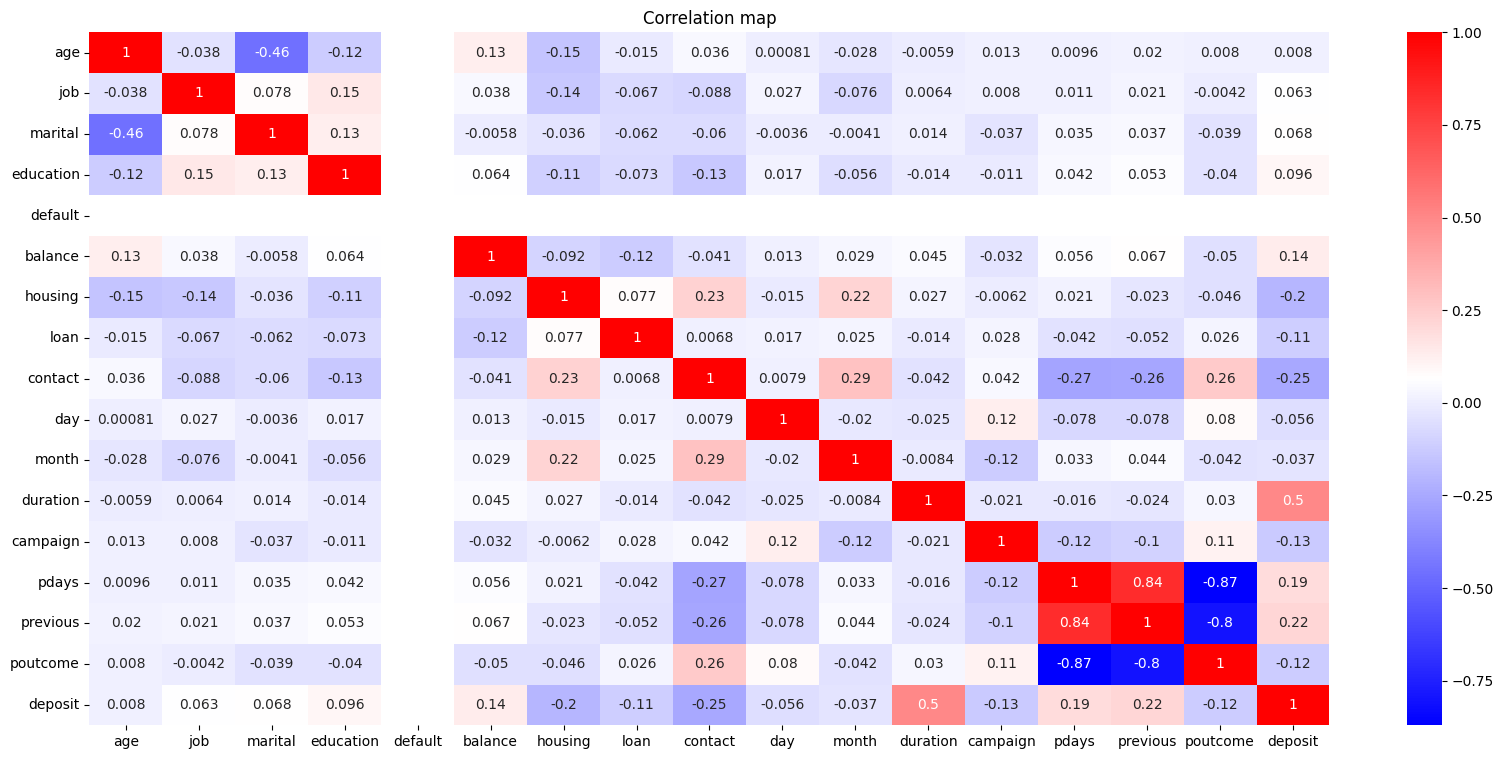

In [ ]:
# Heatmap is use to display correlation between different variable
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),annot=True,cmap='bwr');
plt.title("Correlation map")

#Data Preparation

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [ ]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1760
           1       0.78      0.75      0.76      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



DecisionTreeClassifier()

In [ ]:
dt.feature_importances_

array([0.08387836, 0.03944631, 0.01730818, 0.01273256, 0.00084141,
       0.0798373 , 0.04380061, 0.00537879, 0.06176405, 0.07671668,
       0.09574159, 0.34729726, 0.02418838, 0.04754378, 0.02009335,
       0.04343141])

## Hyperparameter tunning

In [ ]:
dt1=DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



DecisionTreeClassifier(max_depth=10)

In [ ]:
for i in range(1,50):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.7121528814571514
2: 0.7121528814571514
3: 0.771275007464915
4: 0.78501045088086
5: 0.798745894296805
6: 0.8008360704687967
7: 0.8148701104807405
8: 0.8163630934607345
9: 0.8085995819647656
10: 0.8178560764407286
11: 0.8226336219767094
12: 0.8175574798447298
13: 0.8136757240967453
14: 0.8011346670647954
15: 0.8020304568527918
16: 0.7930725589728277
17: 0.7909823828008361
18: 0.7888922066288444
19: 0.7832188713048671
20: 0.7862048372648551
21: 0.7841146610928635
22: 0.7897879964168408
23: 0.7888922066288444
24: 0.7876978202448492
25: 0.7838160644968647
26: 0.7918781725888325
27: 0.7903851896088384
28: 0.7841146610928635
29: 0.7829202747088683
30: 0.7933711555688265
31: 0.7903851896088384
32: 0.7856076440728575
33: 0.786503433860854
34: 0.7909823828008361
35: 0.7853090474768588
36: 0.7859062406688564
37: 0.7876978202448492
38: 0.7778441325768887
39: 0.7912809793968348
40: 0.7912809793968348
41: 0.787996416840848
42: 0.7856076440728575
43: 0.7844132576888624
44: 0.783517467900866
45: 

In [ ]:
dt3=DecisionTreeClassifier(max_depth=11)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



DecisionTreeClassifier(max_depth=11)

In [ ]:
dt4=DecisionTreeClassifier(min_samples_leaf=10)  #The minimum number of samples required to be at a leaf node.
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1760
           1       0.81      0.80      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



DecisionTreeClassifier(min_samples_leaf=10)

In [ ]:
for i in range(1,75):
    dt2=DecisionTreeClassifier(min_samples_leaf=i)
    dt2.fit(xtrain,ytrain)
    ypred=dt2.predict(xtest)
    print(f"{i}: {accuracy_score(ytest,ypred)}")

1: 0.7894893998208421
2: 0.7709764108689161
3: 0.7885936100328457
4: 0.7900865930128397
5: 0.7918781725888325
6: 0.7939683487608241
7: 0.8068080023887728
8: 0.8112869513287548
9: 0.8118841445207524
10: 0.8133771275007465
11: 0.8127799343087488
12: 0.8154673036727381
13: 0.8115855479247537
14: 0.8133771275007465
15: 0.8166616900567334
16: 0.8196476560167214
17: 0.8256195879366975
18: 0.8223350253807107
19: 0.8244252015527023
20: 0.8274111675126904
21: 0.8271125709166915
22: 0.8274111675126904
23: 0.8292027470886831
24: 0.8259181845326963
25: 0.8277097641086891
26: 0.8262167811286951
27: 0.8262167811286951
28: 0.8256195879366975
29: 0.8274111675126904
30: 0.8238280083607047
31: 0.8262167811286951
32: 0.8262167811286951
33: 0.8250223947447
34: 0.826515377724694
35: 0.8253209913406987
36: 0.8253209913406987
37: 0.8259181845326963
38: 0.8256195879366975
39: 0.828008360704688
40: 0.8262167811286951
41: 0.829501343684682
42: 0.8286055538966856
43: 0.8289041504926844
44: 0.8253209913406987
45:

In [ ]:
dt6=DecisionTreeClassifier(criterion="gini",min_samples_leaf=41)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1760
           1       0.80      0.85      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



DecisionTreeClassifier(min_samples_leaf=41)

In [ ]:
dt7=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=100,max_depth=3)
mymodel(dt7)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349



DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=100)

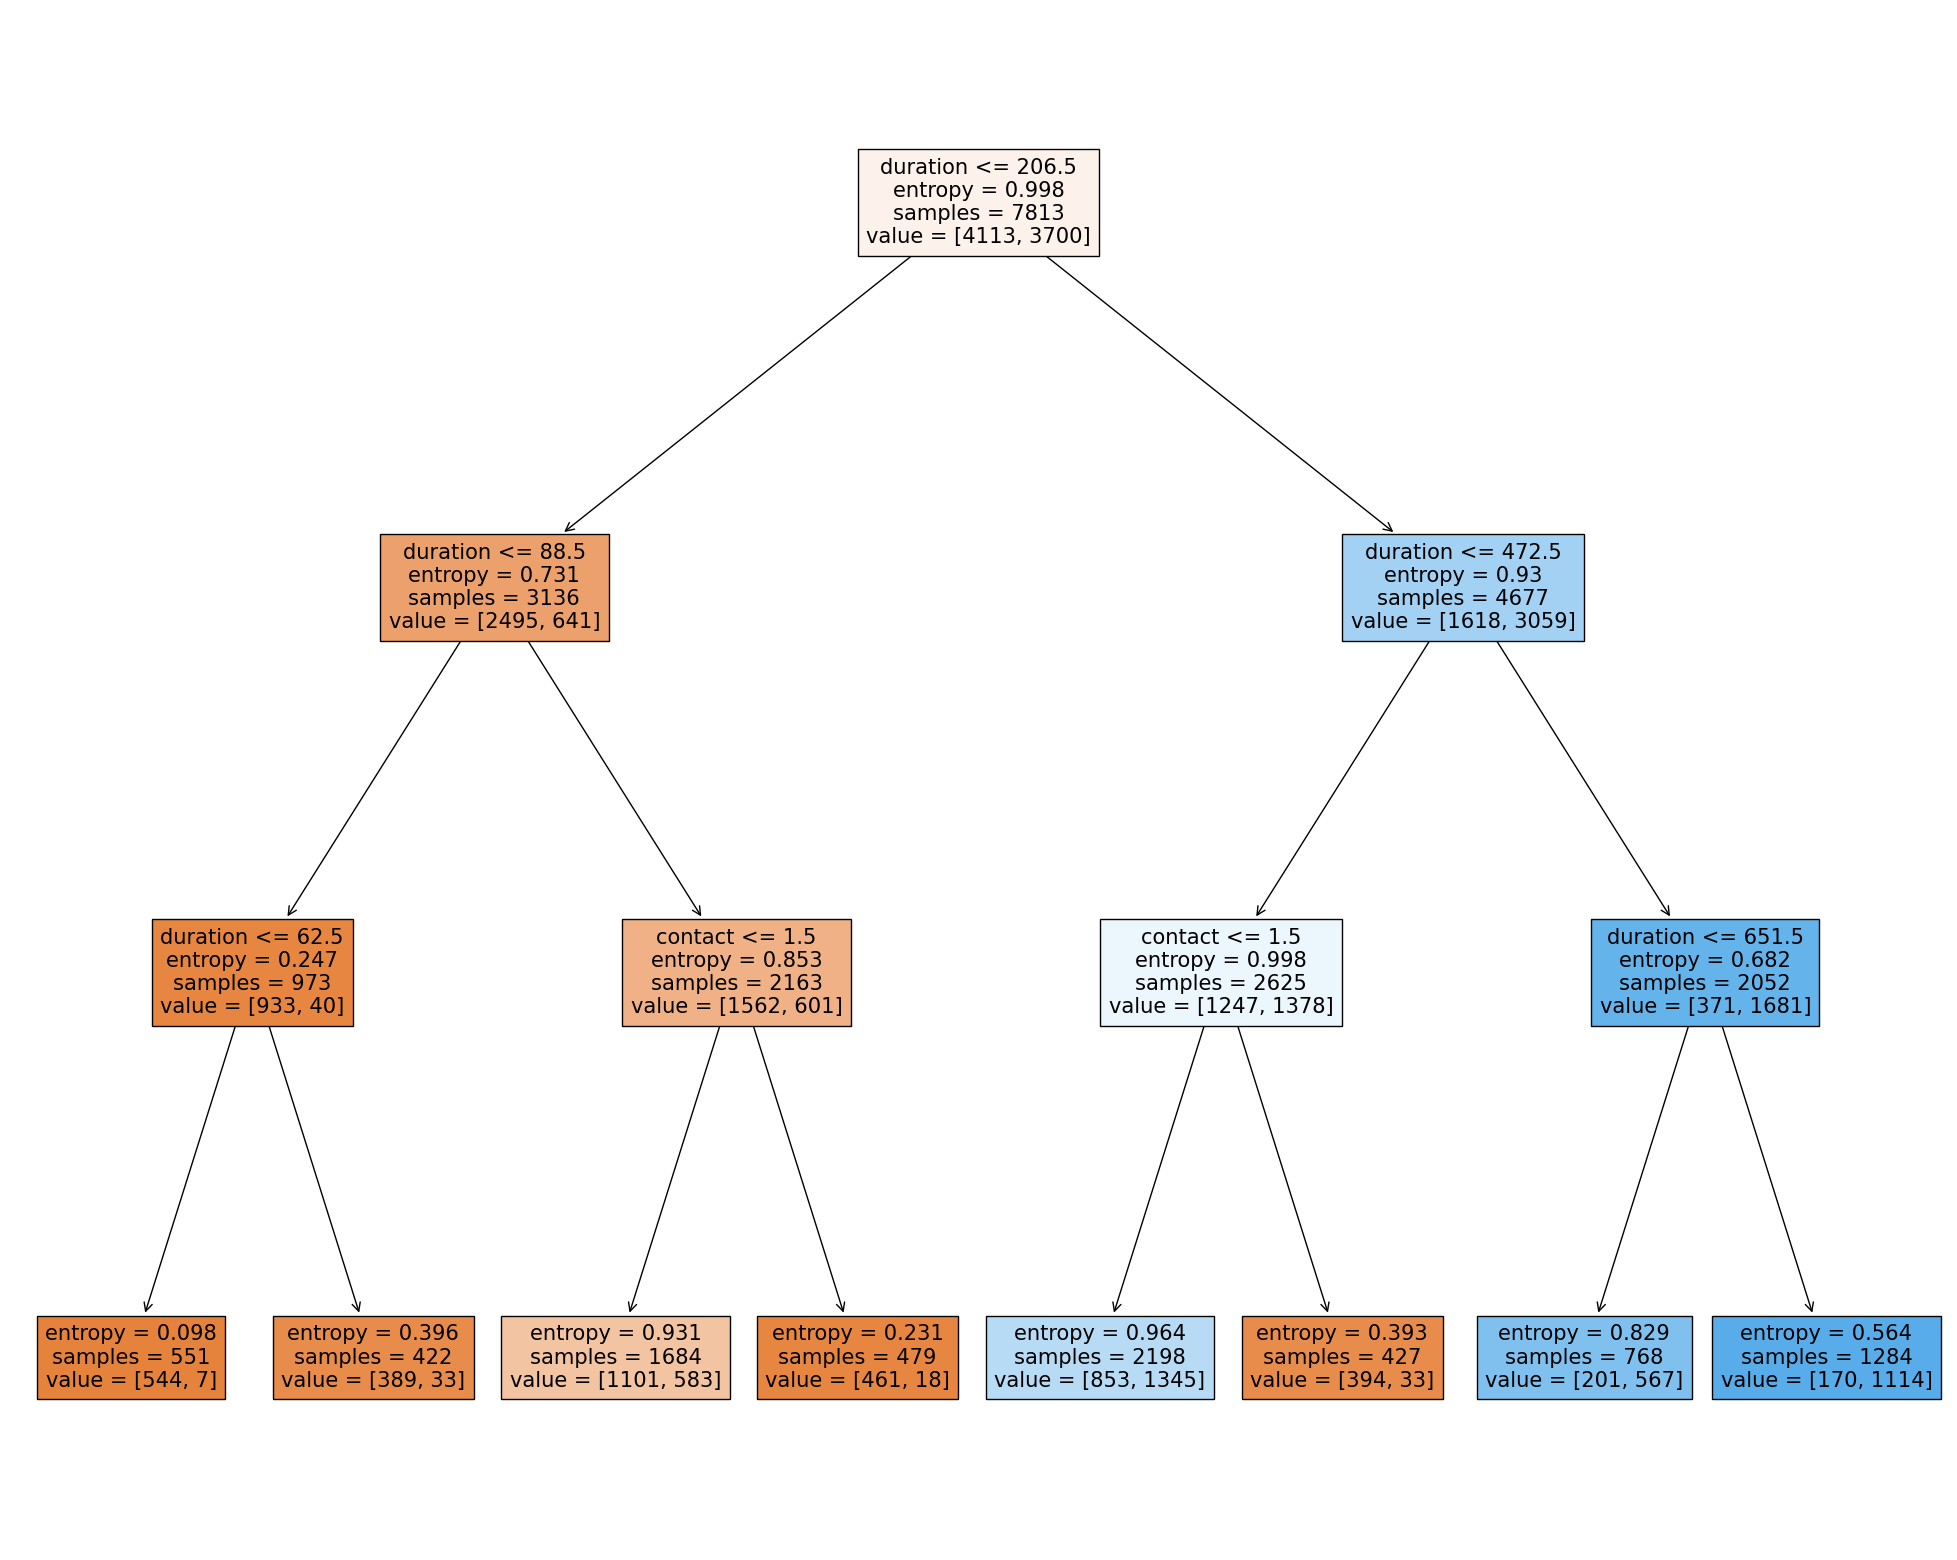

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(dt7,filled=True,feature_names=x.columns)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'criterion' : ['gini', 'entropy'],
          'max_depth' : [ 3, 4, 5, 7],
          'min_samples_leaf' : [10, 20, 50,100,150],
         }

grid_search = GridSearchCV(dt, param_grid= params)

In [ ]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7],
                         'min_samples_leaf': [10, 20, 50, 100, 150]})

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 50}

In [ ]:
my_best_preds = grid_search.predict(xtest)

In [ ]:
accuracy_score(ytest, my_best_preds)

0.8097939683487608

In [ ]:
print(classification_report(ytest, my_best_preds))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1760
           1       0.81      0.78      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



#LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(xtest)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
ytest

8422    0
9226    0
8162    0
4337    1
2438    1
       ..
5642    0
2698    1
9515    0
2651    1
6891    0
Name: deposit, Length: 3349, dtype: int64

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(ytest, y_pred)

0.7659002687369364

In [ ]:
metrics.confusion_matrix(ytest, y_pred)

array([[1402,  358],
       [ 426, 1163]])

In [ ]:
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.76      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.77      0.77      0.77      3349

